In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
df = pd.read_csv('Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Exploring the dataset

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [83]:
df.shape

(400, 9)

In [84]:
df.isnull().any()

Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [85]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,400.0,200.500000,115.614301,1.00,100.75,200.50,300.2500,400.00
GRE Score,400.0,316.807500,11.473646,290.00,308.00,317.00,325.0000,340.00
TOEFL Score,400.0,107.410000,6.069514,92.00,103.00,107.00,112.0000,120.00
University Rating,400.0,3.087500,1.143728,1.00,2.00,3.00,4.0000,5.00
SOP,400.0,3.400000,1.006869,1.00,2.50,3.50,4.0000,5.00
LOR,400.0,3.452500,0.898478,1.00,3.00,3.50,4.0000,5.00
CGPA,400.0,8.598925,0.596317,6.80,8.17,8.61,9.0625,9.92
Research,400.0,0.547500,0.498362,0.00,0.00,1.00,1.0000,1.00
Chance of Admit,400.0,0.724350,0.142609,0.34,0.64,0.73,0.8300,0.97


In [86]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [87]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [88]:
# Renaming the columns with appropriate names
df= df.rename(columns={'GRE Score':'GRE_score','TOEFL Score':'TOEFL_score','University Rating':'University_rating','SOP':'SOP','LOR':'LOR','CGPA':'CGPA','Research':'Research','Chance of Admit ':'Chance_of_Admit'})

In [89]:
df.head()

,Serial No.,GRE_score,TOEFL_score,University_rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Data Visulization

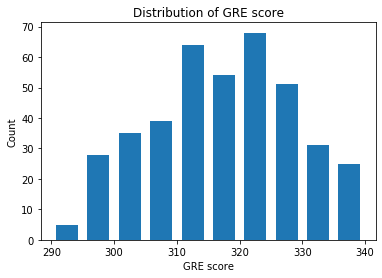

In [90]:
fig = plt.hist(df['GRE_score'],rwidth=0.7)
plt.xlabel('GRE score')
plt.ylabel('Count')
plt.title('Distribution of GRE score')
plt.show()

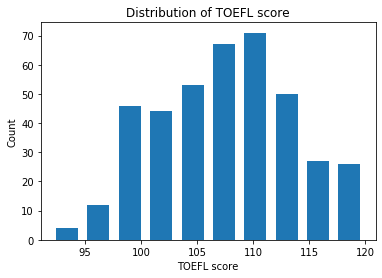

In [91]:
fig = plt.hist(df['TOEFL_score'],rwidth=0.7)
plt.xlabel('TOEFL score')
plt.ylabel('Count')
plt.title('Distribution of TOEFL score')
plt.show()

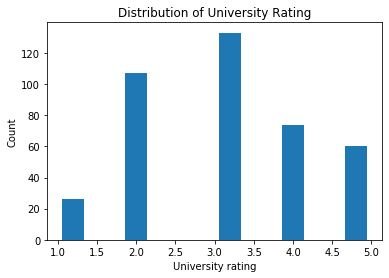

In [92]:
fig = plt.hist(df['University_rating'],rwidth=0.7)
plt.xlabel('University rating')
plt.ylabel('Count')
plt.title('Distribution of University Rating')
plt.show()

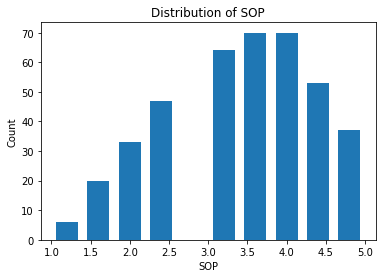

In [93]:
fig = plt.hist(df['SOP'],rwidth=0.7)
plt.xlabel('SOP')
plt.ylabel('Count')
plt.title('Distribution of SOP')
plt.show()

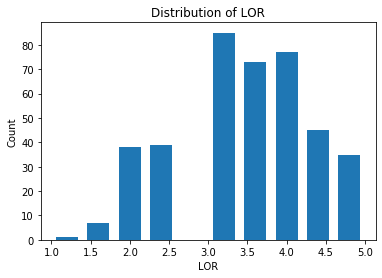

In [94]:
fig = plt.hist(df['LOR '],rwidth=0.7)
plt.xlabel('LOR')
plt.ylabel('Count')
plt.title('Distribution of LOR')
plt.show()

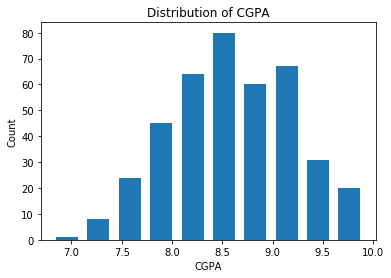

In [95]:
fig = plt.hist(df['CGPA'],rwidth=0.7)
plt.xlabel('CGPA')
plt.ylabel('Count')
plt.title('Distribution of CGPA')
plt.show()

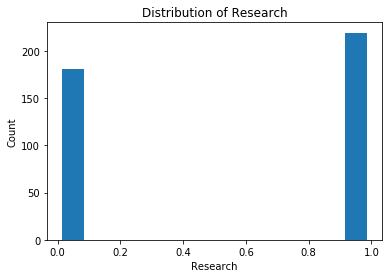

In [96]:
fig = plt.hist(df['Research'],rwidth=0.7)
plt.xlabel('Research')
plt.ylabel('Count')
plt.title('Distribution of Research')
plt.show()

### Data Cleaning

In [97]:
# Removing the serial no column
df.drop('Serial No.',axis=1,inplace=True)

In [98]:
df.head()

,GRE_score,TOEFL_score,University_rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [99]:
# Replacing the 0 values from ['GRE','TOEFL','University Rating','SOP','LOR','CGPA'] by NaN
df_copy = df.copy(deep=True)
df_copy[['GRE_score','TOEFL_score','University_rating','SOP','LOR ','CGPA']] = df_copy[['GRE_score','TOEFL_score','University_rating','SOP','LOR ','CGPA']].replace(0, np.NaN)
df_copy.isnull().sum()

GRE_score            0
TOEFL_score          0
University_rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64

### Model Building

In [100]:
X = df.iloc[:,:-1] #independent features
y = df.iloc[:,-1]  #dependent features

In [101]:
X.shape

(400, 7)

In [102]:
y.shape

(400,)

In [103]:
# Using GridSearchCV to find the best algorithms
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [104]:
# Creating a function to calculate best model for this problem
def find_best_model(X, y):
    models = {
        'linear_regression': {
            'model': LinearRegression(),
            'parameters': {
                'normalize': [True,False]
            }
        },
        
        'lasso': {
            'model': Lasso(),
            'parameters': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        
        'svr': {
            'model': SVR(),
            'parameters': {
                'gamma': ['auto','scale']
            }
        },
        
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'parameters': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        },
        
        'random_forest': {
            'model': RandomForestRegressor(criterion='mse'),
            'parameters': {
                'n_estimators': [5,10,15,20]
            }
        },
        
        'knn': {
            'model': KNeighborsRegressor(algorithm='auto'),
            'parameters': {
                'n_neighbors': [2,5,10,20]
            }
        }
    }
    
    scores = []
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv=5, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])
        
find_best_model(X, y)

,model,best_parameters,score
0,linear_regression,{'normalize': False},0.771179
1,lasso,"{'alpha': 1, 'selection': 'random'}",0.212083
2,svr,{'gamma': 'scale'},0.608251
3,decision_tree,"{'criterion': 'friedman_mse', 'splitter': 'best'}",0.539508
4,random_forest,{'n_estimators': 20},0.740497
5,knn,{'n_neighbors': 20},0.679666


#### Since the Linear Regression algorithm has the highest accuracy, the model selected for this problem is Linear Regression.

In [105]:
# Using cross_val for getting better accuarcy
from sklearn.model_selection import cross_val_score
score = cross_val_score(LinearRegression(normalize=True),X,y,cv=5)
print('Highest Accuracy : {}%'.format(round(sum(score)*100/len(score)), 3))

Highest Accuracy : 77%


In [107]:
# Spliting the dataset into Train and Test Set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=5)
print(len(X_train), len(X_test))

320 80


In [110]:
# Creating Linear Model
model = LinearRegression(normalize=True)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.772829262603884

### Predicting the values using our trained model

In [113]:
# Prediction 1
print("Chances of getting admission is {}%".format(round(model.predict([[337, 118, 4, 4.5, 4.5, 9.65, 0]])[0]*100,3)))

Chances of getting admission is 93.297%


In [ ]:
# Prediction 2
print("Chances of getting Admission is {}%".format(round(model.predict([[]])))